In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import metrics,svm
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE, SelectFromModel, chi2, SelectKBest
from statistics import mode
from sklearn.model_selection import train_test_split
#from statistics import model
import statistics


In [33]:
df = pd.read_csv('D:\\Education\\College\\sem 6\\Machine Learning\\Project\\Company bankrup\\data.csv')
print(df.shape)
df.head()


(6819, 96)


Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [4]:
sum(df.isna().sum())

0

# Project Timeline
# Modules

## Module 1(Preprocess): Split the data, explore and visualize the data features and decide a model to fit the data
## Module 2(Model Definition): Define models and do the first training and validation/testing
## Module 3(Train,test, optimization): Try to optimize the model without the chance of overfitting,train the optimized models and get the metrics again and compare with the non-optimized models, take the best models 
## Module 4(Divide and conquer): From the best models and their accuracies, correlation and other factors(yet to identified) form a weighted equation that predicts the final value.

# Functionalities
# Expected Functionality of the final model
## Classify the company whether it would get bankrupt or not using divide and conquer

In [5]:
#Software/Tools Required
#Software: Python 3.7
#Tools/Libraries: pandas,numpy,plotly.express,matplotlib.pyplot,scikit-learn(metrics)

In [6]:
len(df.columns[73:]) #Lalit

23

In [7]:
df.columns[73:]

Index([' Working capitcal Turnover Rate', ' Cash Turnover Rate',
       ' Cash Flow to Sales', ' Fixed Assets to Assets',
       ' Current Liability to Liability', ' Current Liability to Equity',
       ' Equity to Long-term Liability', ' Cash Flow to Total Assets',
       ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity',
       ' Current Liability to Current Assets', ' Liability-Assets Flag',
       ' Net Income to Total Assets', ' Total assets to GNP price',
       ' No-credit Interval', ' Gross Profit to Sales',
       ' Net Income to Stockholder's Equity', ' Liability to Equity',
       ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Net Income Flag', ' Equity to Liability'],
      dtype='object')

In [8]:
df_lal = df.iloc[:,73:] # defining our variables 
df_lal

Working capitcal Turnover Rate   Cash Turnover Rate  \
0                            0.593831         4.580000e+08   
1                            0.593916         2.490000e+09   
2                            0.594502         7.610000e+08   
3                            0.593889         2.030000e+09   
4                            0.593915         8.240000e+08   
...                               ...                  ...   
6814                         0.593985         1.077940e-04   
6815                         0.593954         7.710000e+09   
6816                         0.594025         4.074263e-04   
6817                         0.593997         1.165392e-04   
6818                         0.598674         9.505992e-03   

       Cash Flow to Sales   Fixed Assets to Assets  \
0                0.671568                 0.424206   
1                0.671570                 0.468828   
2                0.671571                 0.276179   
3                0.671519                 0.559144   
4                0.671563                 0.309555   
...                   ...                      ...   
6814             0.671570                 0.400338   
6815             0.671572                 0.096136   
6816             0.671564                 0.055509   
6817             0.671606                 0.246805   
6818             0.672096                 0.005016   

       Current Liability to Liability   Current Liability to Equity  \
0                            0.676269                      0.339077   
1                            0.308589                      0.329740   
2                            0.446027                      0.334777   
3                            0.615848                      0.331509   
4                            0.975007                      0.330726   
...                               ...                           ...   
6814                         0.786888                      0.330914   
6815                         0.849898                      0.329753   
6816                         0.553964                      0.326921   
6817                         0.893241                      0.329294   
6818                         1.000000                      0.326690   

       Equity to Long-term Liability   Cash Flow to Total Assets  \
0                           0.126549                    0.637555   
1                           0.120916                    0.641100   
2                           0.117922                    0.642765   
3                           0.120760                    0.579039   
4                           0.110933                    0.622374   
...                              ...                         ...   
6814                        0.112622                    0.639806   
6815                        0.112329                    0.642072   
6816                        0.110933                    0.631678   
6817                        0.110957                    0.684857   
6818                        0.110933                    0.659917   

       Cash Flow to Liability   CFO to Assets  ...  \
0                    0.458609        0.520382  ...   
1                    0.459001        0.567101  ...   
2                    0.459254        0.538491  ...   
3                    0.448518        0.604105  ...   
4                    0.454411        0.578469  ...   
...                       ...             ...  ...   
6814                 0.458639        0.587178  ...   
6815                 0.459058        0.569498  ...   
6816                 0.452465        0.589341  ...   
6817                 0.471313        0.678338  ...   
6818                 0.483285        0.505531  ...   

       Net Income to Total Assets   Total assets to GNP price  \
0                        0.716845                    0.009219   
1                        0.795297                    0.008323   
2                        0.774670                    0.040003   
3                        0.739555 

In [4]:
Y = df.iloc[:,0].values   #defining our Y variable
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [10]:
df_lal['bankrupt?'] = df['Bankrupt?']

In [11]:
df.describe().T

count      mean  \
Bankrupt?                                           6819.0  0.032263   
 ROA(C) before interest and depreciation before...  6819.0  0.505180   
 ROA(A) before interest and % after tax             6819.0  0.558625   
 ROA(B) before interest and depreciation after tax  6819.0  0.553589   
 Operating Gross Margin                             6819.0  0.607948   
...                                                    ...       ...   
 Liability to Equity                                6819.0  0.280365   
 Degree of Financial Leverage (DFL)                 6819.0  0.027541   
 Interest Coverage Ratio (Interest expense to E...  6819.0  0.565358   
 Net Income Flag                                    6819.0  1.000000   
 Equity to Liability                                6819.0  0.047578   

                                                         std  min       25%  \
Bankrupt?                                           0.176710  0.0  0.000000   
 ROA(C) before interest and depreciation before...  0.060686  0.0  0.476527   
 ROA(A) before interest and % after tax             0.065620  0.0  0.535543   
 ROA(B) before interest and depreciation after tax  0.061595  0.0  0.527277   
 Operating Gross Margin                             0.016934  0.0  0.600445   
...                                                      ...  ...       ...   
 Liability to Equity                                0.014463  0.0  0.276944   
 Degree of Financial Leverage (DFL)                 0.015668  0.0  0.026791   
 Interest Coverage Ratio (Interest expense to E...  0.013214  0.0  0.565158   
 Net Income Flag                                    0.000000  1.0  1.000000   
 Equity to Liability                                0.050014  0.0  0.024477   

                                                         50%       75%  max  
Bankrupt?                                           0.000000  0.000000  1.0  
 ROA(C) before interest and depreciation before...  0.502706  0.535563  1.0  
 ROA(A) before interest and % after tax             0.559802  0.589157  1.0  
 ROA(B) before interest and depreciation after tax  0.552278  0.584105  1.0  
 Operating Gross Margin                             0.605997  0.613914  1.0  
...                                                      ...       ...  ...  
 Liability to Equity                                0.278778  0.281449  1.0  
 Degree of Financial Leverage (DFL)                 0.026808  0.026913  1.0  
 Interest Coverage Ratio (Interest expense to E...  0.565252  0.565725  1.0  
 Net Income Flag                                    1.000000  1.000000  1.0  
 Equity to Liability                                0.033798  0.052838  1.0  

[96 rows x 8 columns]

# Here we are trying to Plot the correlation map of the the whole dataset

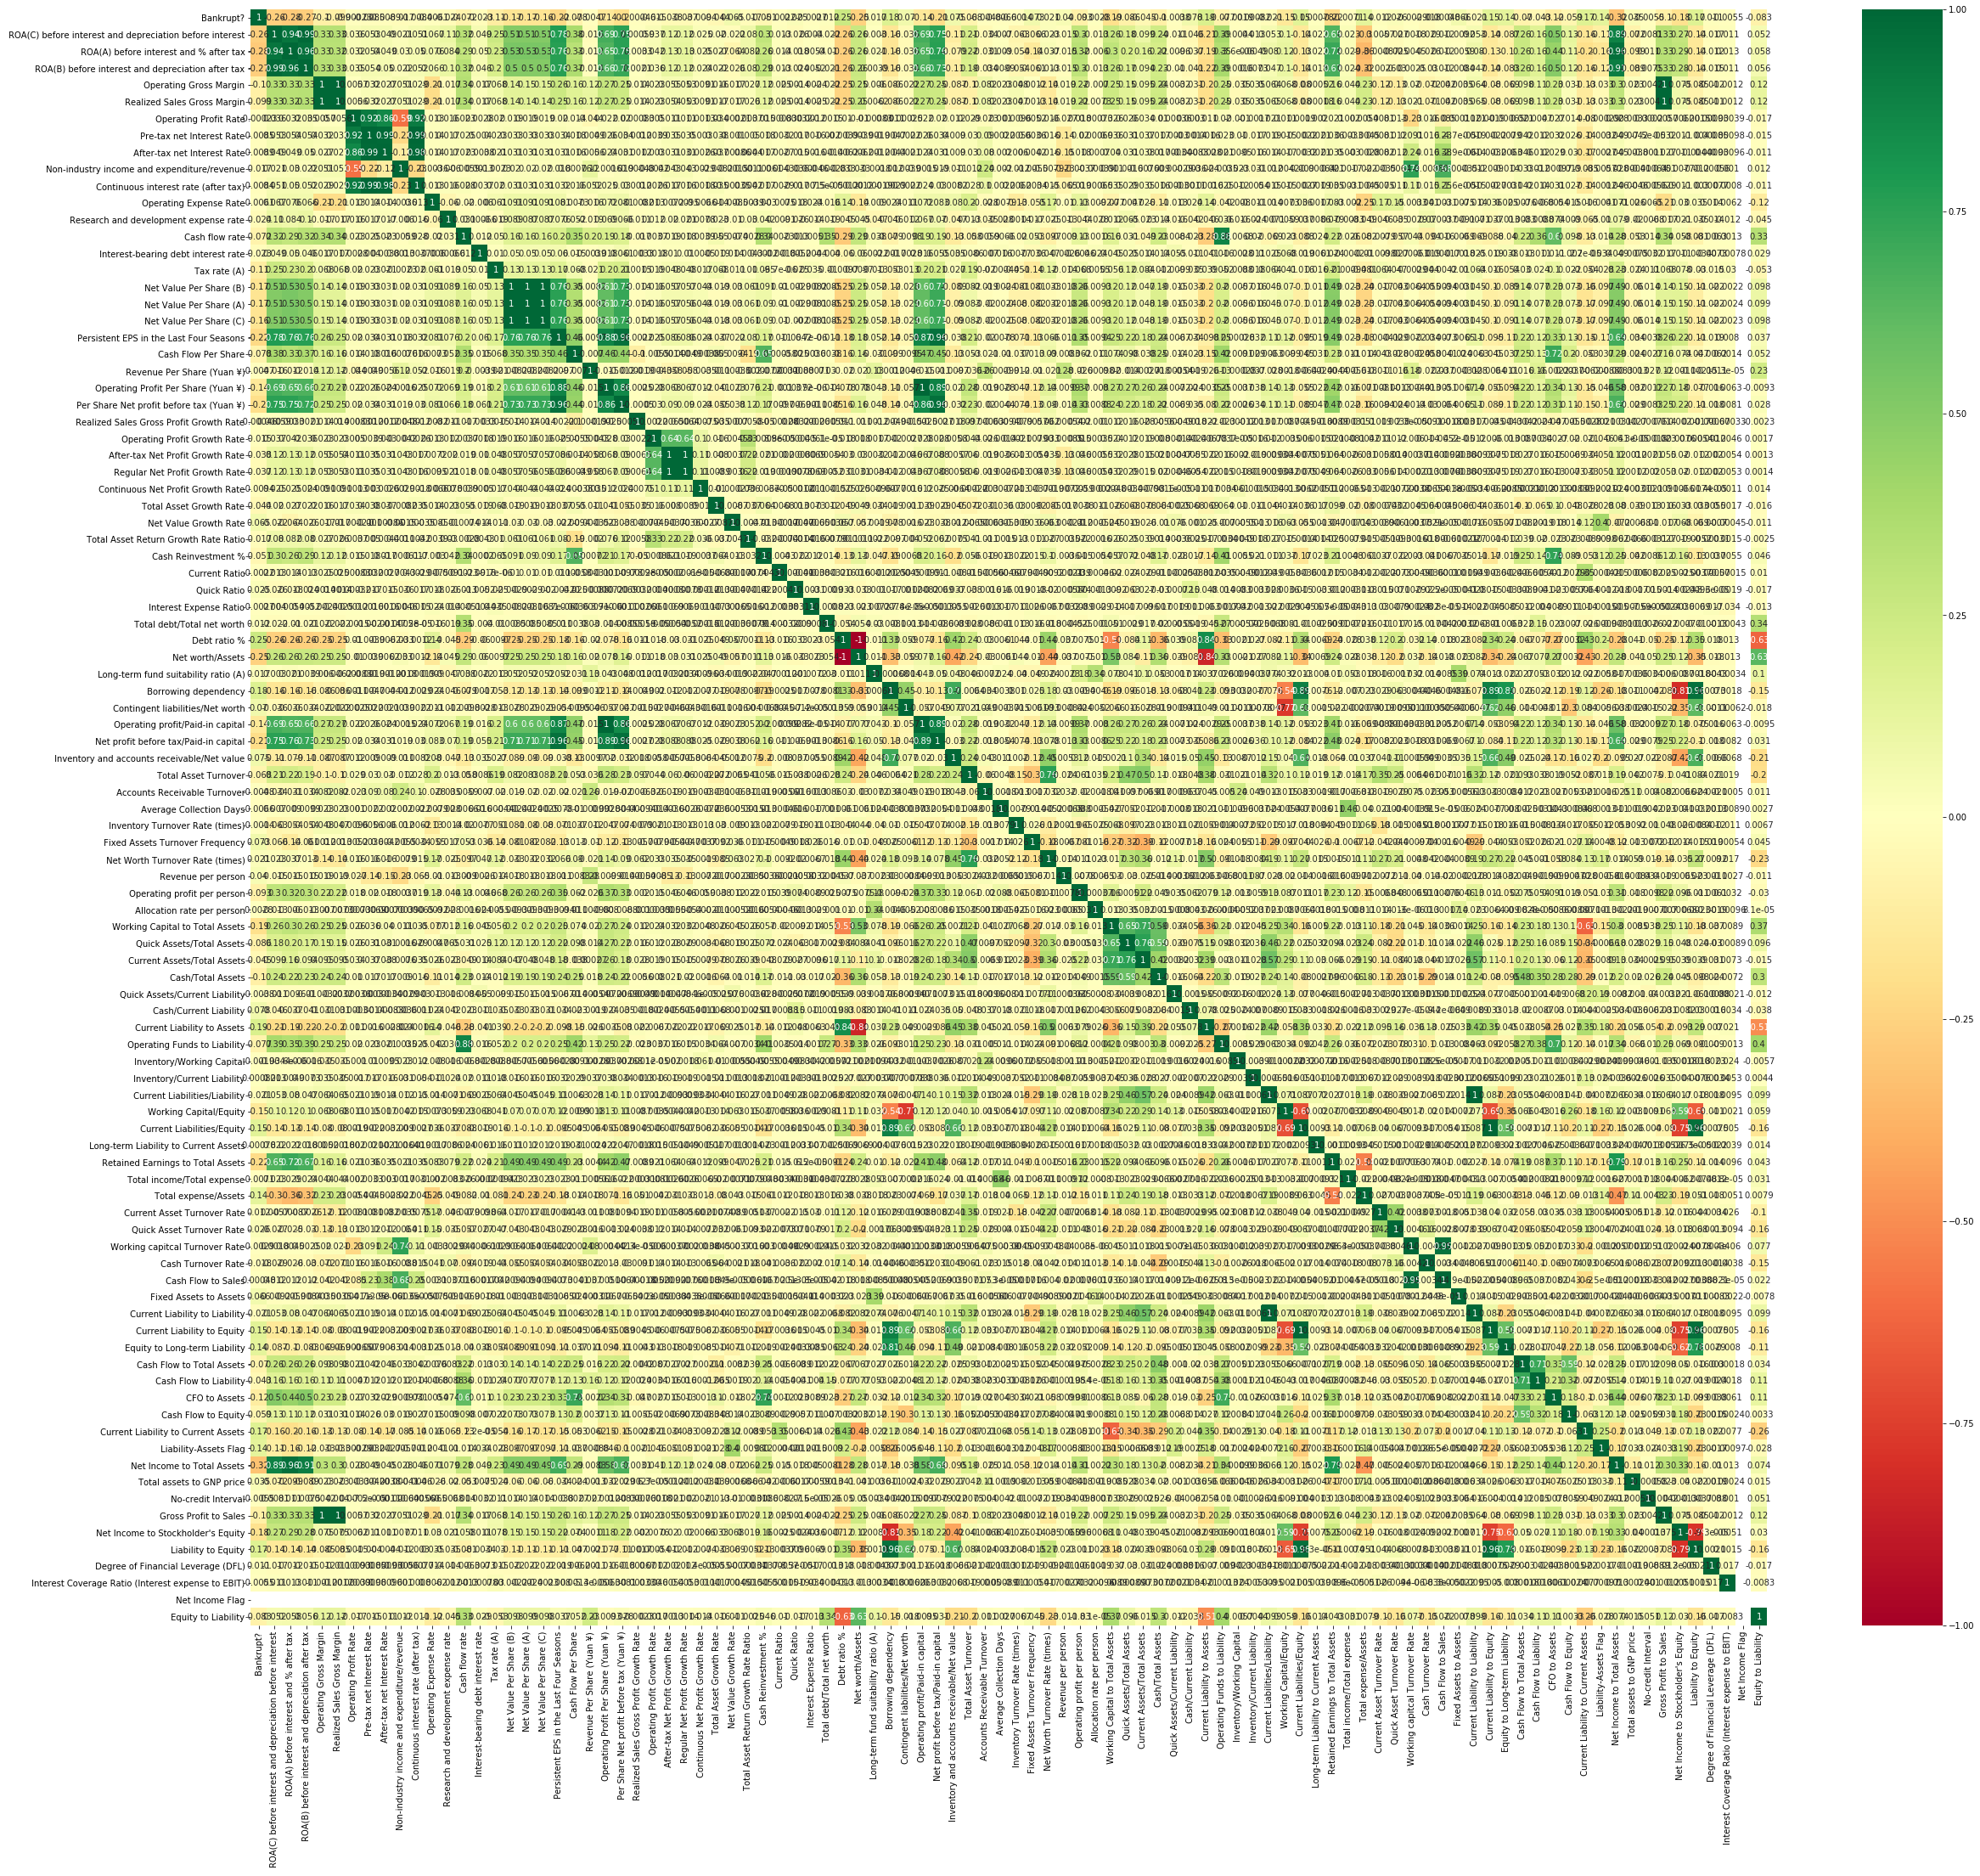

In [12]:

#correlation matrix feture selection
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,35))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
print((df_lal.columns.tolist()))

[' Working capitcal Turnover Rate', ' Cash Turnover Rate', ' Cash Flow to Sales', ' Fixed Assets to Assets', ' Current Liability to Liability', ' Current Liability to Equity', ' Equity to Long-term Liability', ' Cash Flow to Total Assets', ' Cash Flow to Liability', ' CFO to Assets', ' Cash Flow to Equity', ' Current Liability to Current Assets', ' Liability-Assets Flag', ' Net Income to Total Assets', ' Total assets to GNP price', ' No-credit Interval', ' Gross Profit to Sales', " Net Income to Stockholder's Equity", ' Liability to Equity', ' Degree of Financial Leverage (DFL)', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Net Income Flag', ' Equity to Liability', 'bankrupt?']


In [14]:
df_lal.shape[0] - df_lal.drop_duplicates().shape[0]

0

In [15]:
df_lal.describe()

Working capitcal Turnover Rate   Cash Turnover Rate  \
count                      6819.000000         6.819000e+03   
mean                          0.594006         2.471977e+09   
std                           0.008959         2.938623e+09   
min                           0.000000         0.000000e+00   
25%                           0.593934         2.735337e-04   
50%                           0.593963         1.080000e+09   
75%                           0.594002         4.510000e+09   
max                           1.000000         1.000000e+10   

        Cash Flow to Sales   Fixed Assets to Assets  \
count          6819.000000             6.819000e+03   
mean              0.671531             1.220121e+06   
std               0.009341             1.007542e+08   
min               0.000000             0.000000e+00   
25%               0.671565             8.536037e-02   
50%               0.671574             1.968810e-01   
75%               0.671587             3.722000e-01   
max               1.000000             8.320000e+09   

        Current Liability to Liability   Current Liability to Equity  \
count                      6819.000000                   6819.000000   
mean                          0.761599                      0.331410   
std                           0.206677                      0.013488   
min                           0.000000                      0.000000   
25%                           0.626981                      0.328096   
50%                           0.806881                      0.329685   
75%                           0.942027                      0.332322   
max                           1.000000                      1.000000   

        Equity to Long-term Liability   Cash Flow to Total Assets  \
count                     6819.000000                 6819.000000   
mean                         0.115645                    0.649731   
std                          0.019529                    0.047372   
min                          0.000000                    0.000000   
25%                          0.110933                    0.633265   
50%                          0.112340                    0.645366   
75%                          0.117106                    0.663062   
max                          1.000000                    1.000000   

        Cash Flow to Liability   CFO to Assets  ...  \
count              6819.000000     6819.000000  ...   
mean                  0.461849        0.593415  ...   
std                   0.029943        0.058561  ...   
min                   0.000000        0.000000  ...   
25%                   0.457116        0.565987  ...   
50%                   0.459750        0.593266  ...   
75%                   0.464236        0.624769  ...   
max                   1.000000        1.000000  ...   

        Total assets to GNP price   No-credit Interval  \
count                6.819000e+03          6819.000000   
mean                 1.862942e+07             0.623915   
std                  3.764501e+08             0.012290   
min                  0.000000e+00             0.000000   
25%                  9.036205e-04             0.623636   
50%                  2.085213e-03             0.623879   
75%                  5.269777e-03             0.624168   
max                  9.820000e+09             1.000000   

        Gross Profit to Sales   Net Income to Stockholder's Equity  \
count             6819.000000                          6819.000000   
mean                 0.607946                             0.840402   
std                  0.016934                             0.014523   
min                  0.000000                             0.000000   
25%                  0.600443                             0.840115   
50%                  0.605998                             0.841179   
75%                  0.613913                             0.842357   
max                  1.000000                             1.000000   

        Liability to Eq

# Here we have a correlation map of the last 24 entries of the dataset

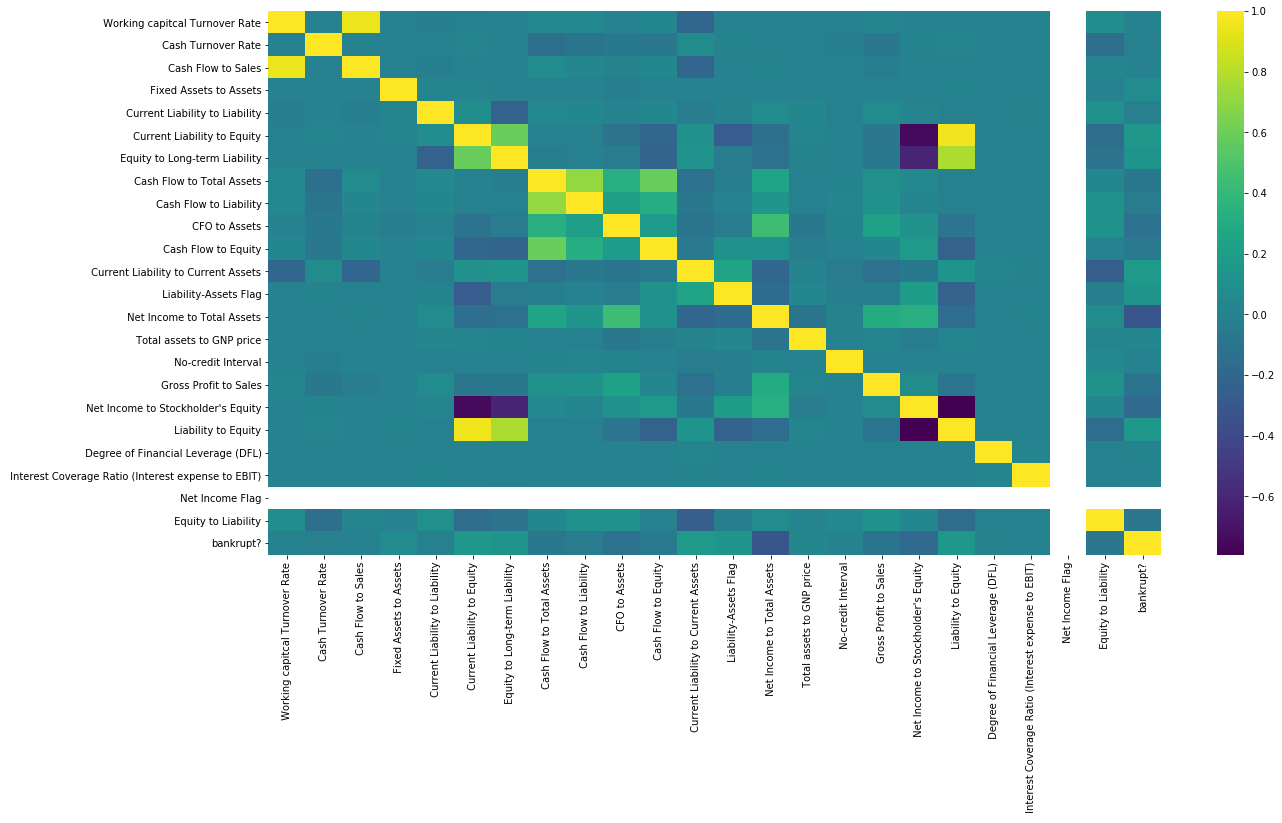

In [16]:
figure = plt.figure(figsize=(20,10))
sns.heatmap(df_lal.corr(),cmap='viridis')
plt.savefig('heatmap.png')
plt.show()

In [17]:
df_lal.corr().loc['bankrupt?'].sort_values()

 Net Income to Total Assets                           -0.315457
 Net Income to Stockholder's Equity                   -0.180987
 CFO to Assets                                        -0.115383
 Gross Profit to Sales                                -0.100044
 Equity to Liability                                  -0.083048
 Cash Flow to Total Assets                            -0.070456
 Cash Flow to Equity                                  -0.058563
 Cash Flow to Liability                               -0.043125
 Current Liability to Liability                       -0.020809
 Cash Turnover Rate                                   -0.018035
 No-credit Interval                                   -0.005547
 Interest Coverage Ratio (Interest expense to EBIT)   -0.005509
 Working capitcal Turnover Rate                       -0.002894
 Cash Flow to Sales                                    0.000479
 Degree of Financial Leverage (DFL)                    0.010508
 Total assets to GNP price              

In [34]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(df_lal,Y)

NameError: name 'df_lal' is not defined

In [100]:
roc_acc = cross_val_score(KNN, X_train, y_train, cv=5, scoring='roc_auc_ovr').mean()
roc_acc
# 


0.5688687420031128

In [36]:
Log = LogisticRegression(max_iter=1000)
Log = LogisticRegression

In [ ]:
# to find the best fit value of K rather than simply giving a value using graph. Here the range of K is 1-40. In each iteration
#the mean error for predicted values of test set is calculated and the result is appended to the error list.

error = []

# Calculating error for K values between 5 and 40
for i in range(5, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != t_test))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(5, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('KNnerror.png')# we see that the mean error is lowest at K values between 5 and 10.

# Review 2

In [ ]:
#logistic regression with unstandardized data

In [37]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values   #defining our Y variable
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [38]:
X

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 1.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 1.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.47272461, 0.533744  , 0.52063815, ..., 0.5651584 , 1.        ,
        0.09764874],
       [0.50626432, 0.5599106 , 0.55404465, ..., 0.56530151, 1.        ,
        0.04400945],
       [0.49305319, 0.57010467, 0.54954762, ..., 0.56516694, 1.        ,
        0.23390224]])

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [44]:
# here we are testing using SVC and finding the accuracy
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [45]:

y_pred = clf.predict(X_test) # Predict values for our test data

acc = metrics.accuracy_score(y_test, y_pred)
acc   # here we see that the accuracy is close to 96% which is good 

0.9687194525904204

In [46]:
#np.mean(y_test==SVC().fit(X_train,y_train).predict(X_test))


# now we are trying to apply Logistic Regression to the model and find the accuracy 

In [47]:
Log = LogisticRegression(random_state=0, solver='sag', penalty='l2', max_iter=1000, multi_class='multinomial')
Log.fit(X_train, y_train)
y_pred = Log.predict(X_test)

In [48]:
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9652981427174976

In [49]:
log_loss(y_test,y_pred) # a lower log-loss value means better predictions

1.198562424839038

In [50]:
confusion_matrix(y_test,y_pred)

array([[1975,    7],
       [  64,    0]], dtype=int64)

In [51]:
KNN = KNeighborsClassifier()

In [52]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = KNN.predict(X_test)
print("Prediction is",y_pred_knn)

Prediction is [0 0 0 ... 0 0 0]


In [54]:
acc = metrics.accuracy_score(y_test, y_pred)
print('The accuracy is',acc)

The accuracy is 0.9652981427174976


In [55]:
np.mean(y_pred_knn==y_test)

0.967741935483871

In [56]:
confusion_matrix(y_test,y_pred_knn)

array([[1980,    2],
       [  64,    0]], dtype=int64)

# here we are doing using The DecisionTree

In [57]:
DTC = DecisionTreeClassifier()

In [58]:
DTC.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

In [59]:
y_pred_dtc = DTC.predict(X_test)

In [60]:
print('The accuracy is ',np.mean(y_pred_dtc==y_test))

The accuracy is  0.9516129032258065


In [61]:
confusion_matrix(y_test,y_pred_dtc)

array([[1923,   59],
       [  40,   24]], dtype=int64)

# logistic Regression

In [62]:
model = LogisticRegression(solver='lbfgs')

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=False)

In [64]:
rfe = RFE(model,n_features_to_select=5)

In [65]:
fit = rfe.fit(X_train,y_train)

In [66]:
y_pred = fit.predict(X_test)

In [67]:
np.mean(y_test==y_pred)

0.9838709677419355

In [68]:
Log_standard = LogisticRegression()

In [69]:
Log_standard.fit(X_train,y_train)

LogisticRegression()

In [70]:
y_pred_log_standard = Log_standard.predict(X_test)

In [71]:
np.mean(y_pred_log_standard==y_test)

0.978494623655914

In [72]:
confusion_matrix(y_test,y_pred_log_standard)

array([[2002,   12],
       [  32,    0]], dtype=int64)

In [73]:
confusion_matrix(y_test,y_pred)

array([[2013,    1],
       [  32,    0]], dtype=int64)

In [74]:
np.mean(y_test==KNeighborsClassifier().fit(X_train,y_train).predict(X_test))

0.9833822091886608

In [75]:
np.mean(y_test==DecisionTreeClassifier().fit(X_train,y_train).predict(X_test))

0.9667644183773216

# Results for Exploratory model selection with no feature selection
# Scaler Used: StandardScaler from sklearn.preprocessing


# Logistic Regression
## Accuracy before Standardizing: 0.968475073313783
## Accuracy after Standardizing: 0.9706744868035191

# KNN Classifier, k=default
## Accuracy before Standardizing: 0.9750733137829912
## Accuracy after Standardizing: 0.9750733137829912

# Decision Tree Classifier
## Accuracy before Standardizing: 0.9523460410557185
## Accuracy after Standardizing: 0.9604105571847508

In [41]:
#Approach 1: Boost the predictions of RFE, KNN, SVC and Random Forest

import warnings
warnings.filterwarnings(action='ignore')
class Divide_And_Conquer():
    def __init__(self,X,Y,test_size=0.3,est=AdaBoostClassifier(learning_rate=1e-4)):
        self.X = X
        self.Y = Y
        self.test_size = test_size
        #self.n_prep=n_prep
        self.fit_model()
        self.train_divide_and_conquer(est)
        self.accuracy_comp()     
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)

    def split_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def prep(self):
        self.fit_model()
        self.X_model = np.array([])
        self.Y_model = np.array([])
        #self.split()
        self.rfe_pred = self.rfe.predict(self.X_test)
        self.knn_pred = self.knn_fit.predict(self.X_test)
        self.rfc_pred = self.rfc.predict(self.X_test)
        self.rf_pred = self.rf.predict(self.X_test)
        for i,j,k,l,m in zip(self.rfe_pred,self.knn_pred,self.rfc_pred,self.rf_pred,self.y_test):
            if len(self.X_model)==0:
                self.X_model = np.array([i,j,k,l])
                self.Y_model = np.array([m])
            else:
                self.X_model = np.vstack((self.X_model,np.array([i,j,k,l])))  #numpy.vstack() function is used to stack the sequence of input arrays vertically to make a single array.
                self.Y_model = np.vstack((self.Y_model,np.array([m])))
    
    def train_divide_and_conquer(self,est=RandomForestClassifier()):
        self.prep()
        self.model = est.fit(self.X_model,self.Y_model)
        
    def prep_test(self):
        x  = np.array([])
        rfe_pred = self.rfe.predict(self.X_test)
        knn_pred = self.knn_fit.predict(self.X_test)
        rfc_pred = self.rfc.predict(self.X_test)
        rf_pred = self.rf.predict(self.X_test)
        for i,j,k,l in zip(rfe_pred,knn_pred,rfc_pred,rf_pred):
            if len(x)==0:
                x = np.array([i,j,k,l])
            else:
                x = np.vstack((x,np.array([i,j,k,l])))
        return x
    
    def fit_model(self):
        self.split()
        self.log = LogisticRegression()
        self.rfe = RFE(self.log,n_features_to_select=24)
        #self.fit = self.rfe.fit(self.fm_xtrain,self.fm_ytrain)
        self.knn = KNeighborsClassifier()
        self.rfc = SVC(kernel='rbf')
        self.rf = RandomForestClassifier(max_features=24)
        #self.vote = VotingClassifier(estimators=[('rfe',self.rfe),('knn',self.knn)],voting='hard').fit(self.X_train,self.y_train)
        #self.rfc_features = SelectFromModel(estimator=RandomForestClassifier(),max_features=35).fit(self.X_train,self.y_train).get_support()
        #self.X_train_sup = self.X_train[:,self.rfc_features]
        #self.X_test_sup = self.X_test[:,self.rfc_features]
        self.knn_fit = self.knn.fit(self.X_train,self.y_train)
        self.rfc = self.rfc.fit(self.X_train,self.y_train)
        self.rf = self.rf.fit(self.X_train,self.y_train)
        self.fit = self.rfe.fit(self.X_train,self.y_train)
        self.rfe_accuracy = np.mean(self.y_test==self.rfe.predict(self.X_test))
        #self.knn_accuracy = np.mean(self.y_test==self.knn.predict(self.X_test))
        self.rfc_accuracy = np.mean(self.y_test==self.rfc.predict(self.X_test))
        self.rf_accuracy = np.mean(self.y_test==self.rf.predict(self.X_test))
        #self.SVC = SVC(kernel='rbf')
        #self.svc_feature = SelectKBest(score_func=chi2,k=75)
        #self.svc_feature = self.svc_feature.fit(self.X_train,self.y_train)
        
    def predict(self):
        #self.fit_pred = self.fit.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        self.pred = self.vote.predict(self.X_test)
        return self.pred
    
    def accuracy_comp(self):
        self.split()
        print('KNN Accuracy: ',np.mean(self.y_test==self.knn_fit.predict(self.X_test)))
        print('SVC Accuracy: ',np.mean(self.y_test==self.rfc.predict(self.X_test)))
        print('RFE(Logistic) Accuracy: ',np.mean(self.y_test==self.rfe.predict(self.X_test)))
        print('Random Forest Accuracy: ',self.rf_accuracy)
        #print('Divide and Conquer Accuracy(Vote): ',np.mean(self.y_test==self.predict()))
        print('Divide and Conquer Accuracy(AdaBoost): ',np.mean(self.y_test==self.model.predict(self.prep_test())))

In [42]:
#X = df.iloc[:,1:].values

In [43]:
#Y = df.iloc[:,0].values

In [44]:
dc = Divide_And_Conquer(X,Y)

KNN Accuracy:  0.9667644183773216
SVC Accuracy:  0.9657869012707723
RFE(Logistic) Accuracy:  0.9550342130987293
Random Forest Accuracy:  0.9726295210166178
Divide and Conquer Accuracy(AdaBoost):  0.9926686217008798


In [59]:
dc_1 = Divide_And_Conquer(X,Y,test_size=0.75)

KNN Accuracy:  0.9657869012707723
SVC Accuracy:  0.9659824046920821
RFE(Logistic) Accuracy:  0.963049853372434
Random Forest Accuracy:  0.9702834799608994
Divide and Conquer Accuracy(AdaBoost):  0.9759530791788856


In [60]:
dc_2 = Divide_And_Conquer(X,Y,test_size=0.9)

KNN Accuracy:  0.9659498207885304
SVC Accuracy:  0.9661127403062887
RFE(Logistic) Accuracy:  0.9558488106875204
Random Forest Accuracy:  0.9685565330726621
Divide and Conquer Accuracy(AdaBoost):  0.9705115672857608


In [61]:
#Approach 2: Boost, Bag and Vote
import warnings
warnings.filterwarnings(action='ignore')
class Divide_And_Conquer2():
    def __init__(self,X,Y,test_size=0.3):
        self.X = X
        self.Y = Y
        self.test_size = test_size
        #self.n_prep=n_prep
        self.fit_model()
        #self.train_divide_and_conquer(est)
        self.accuracy_comp()
        #self.split()
        #self.fit()
        #self.accuracy_comp()
        
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)

    def split_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def prep(self):
        self.fit_model()
        self.X_model = np.array([])
        self.Y_model = np.array([])
        #self.split()
        self.rfe_pred = self.rfe.predict(self.X_test)
        self.knn_pred = self.knn_fit.predict(self.X_test)
        self.rfc_pred = self.rfc.predict(self.X_test)
        self.rf_pred = self.rf.predict(self.X_test[:,self.rfc_features])
        for i,j,k,l,m in zip(self.rfe_pred,self.knn_pred,self.rfc_pred,self.rf_pred,self.y_test):
            if len(self.X_model)==0:
                self.X_model = np.array([i,j,k,l])
                self.Y_model = np.array([m])
            else:
                self.X_model = np.vstack((self.X_model,np.array([i,j,k,l])))
                self.Y_model = np.vstack((self.Y_model,np.array([m])))
    
    def train_divide_and_conquer(self,est=VotingClassifier):
        self.prep()
        self.model = est.fit(self.X_model,self.Y_model)
        
    def prep_test(self):
        x  = np.array([])
        rfe_pred = self.rfe.predict(self.X_test)
        knn_pred = self.knn_fit.predict(self.X_test)
        rfc_pred = self.rfc.predict(self.X_test)
        rf_pred = self.rf.predict(self.X_test[:,self.rfc_features])
        for i,j,k,l in zip(rfe_pred,knn_pred,rfc_pred,rf_pred):
            if len(x)==0:
                x = np.array([i,j,k,l])
            else:
                x = np.vstack((x,np.array([i,j,k,l])))
        return x
    
    def fit_model(self):
        self.split()
        self.log = LogisticRegression()
        self.rfe = RFE(self.log,n_features_to_select=5)
        #self.fit = self.rfe.fit(self.fm_xtrain,self.fm_ytrain)
        #self.knn = KNeighborsClassifier()
        #self.rfc = SVC(kernel='rbf')
        self.rf = RandomForestClassifier(max_features=35)
        self.ada = AdaBoostClassifier()
        self.vote = VotingClassifier(estimators=[('rf',self.rf),('ada',self.ada)],voting='soft').fit(self.X_train,self.y_train)
        #self.rfc_features = SelectFromModel(estimator=RandomForestClassifier(),max_features=35).fit(self.X_train,self.y_train).get_support()
        #self.X_train_sup = self.X_train[:,self.rfc_features]
        #self.X_test_sup = self.X_test[:,self.rfc_features]
        #self.knn_fit = self.knn.fit(self.X_train,self.y_train)
        #self.rfc = self.rfc.fit(self.X_train,self.y_train)
        self.rf = self.rf.fit(self.X_train,self.y_train)
        self.ada = self.ada.fit(self.X_train,self.y_train)
        #self.fit = self.rfe.fit(self.X_train,self.y_train)
        #self.rfe_accuracy = np.mean(self.y_test==self.rfe.predict(self.X_test))
        #self.knn_accuracy = np.mean(self.y_test==self.knn.predict(self.X_test))
        #self.rfc_accuracy = np.mean(self.y_test==self.rfc.predict(self.X_test))
        self.rf_accuracy = np.mean(self.y_test==self.rf.predict(self.X_test))
        self.ada_accuracy = np.mean(self.y_test==self.ada.predict(self.X_test))
        #self.SVC = SVC(kernel='rbf')
        #self.svc_feature = SelectKBest(score_func=chi2,k=75)
        #self.svc_feature = self.svc_feature.fit(self.X_train,self.y_train)
        
    def predict(self):
        #self.fit_pred = self.fit.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        self.pred = self.vote.predict(self.X_test)
        return self.pred
    
    def accuracy_comp(self):
        #self.split()
        #print('KNN Accuracy: ',self.knn_accuracy)
        #print('SVC Accuracy: ',self.rfc_accuracy)
        #print('RFE(Logistic) Accuracy: ',self.rfe_accuracy)
        print('Random Forest Accuracy: ',self.rf_accuracy)
        print('Ada Boost Accuracy: ',self.ada_accuracy)
        print('Divide and Conquer Accuracy(Vote): ',np.mean(self.y_test==self.predict()))
        #print('Divide and Conquer Accuracy(AdaBoost): ',np.mean(self.y_test==self.model.predict(self.prep_test())))

In [62]:
dc = Divide_And_Conquer2(X,Y)

Random Forest Accuracy:  0.9628543499511242
Ada Boost Accuracy:  0.9623655913978495
Divide and Conquer Accuracy(Vote):  0.9623655913978495


In [63]:
#Approach 3: Vote(RFE,KNN,SVC), bag(Random Forest) and boost(Ada Boost)

class Divide_And_Conquer3():
    def __init__(self,X,Y,test_size=0.3,est=AdaBoostClassifier()):
        self.X = X
        self.Y = Y
        self.test_size = test_size
        #self.n_prep=n_prep
        #self.fit_model()
        self.train_divide_and_conquer(est)
        self.accuracy_comp()
        #self.split()
        #self.fit()
        #self.accuracy_comp()
        
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)

    def split_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def prep(self):
        self.fit_model()
        self.X_model = np.array([])
        self.Y_model = np.array([])
        #self.split()
        #self.rfe_pred = self.rfe.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        #self.rfc_pred = self.rfc.predict(self.X_test)
        self.vote_pred = self.vote.predict(self.X_test)
        self.rf_pred = self.rf.predict(self.X_test)
        for i,j,m in zip(self.vote_pred,self.rf_pred,self.y_test):
            if len(self.X_model)==0:
                self.X_model = np.array([i,j])
                self.Y_model = np.array([m])
            else:
                self.X_model = np.vstack((self.X_model,np.array([i,j])))
                self.Y_model = np.vstack((self.Y_model,np.array([m])))
    
    def train_divide_and_conquer(self,est=AdaBoostClassifier()):
        self.prep()
        self.model = est.fit(self.X_model,self.Y_model)
        
    def prep_test(self):
        x  = np.array([])
        #rfe_pred = self.rfe.predict(self.X_test)
        #knn_pred = self.knn_fit.predict(self.X_test)
        #rfc_pred = self.rfc.predict(self.X_test)
        vote_pred = self.vote.predict(self.X_test)
        rf_pred = self.rf.predict(self.X_test)
        for i,j in zip(vote_pred,rf_pred):
            if len(x)==0:
                x = np.array([i,j])
            else:
                x = np.vstack((x,np.array([i,j])))
        return x
    
    def fit_model(self):
        self.split()
        self.bestfeatures = SelectKBest(score_func=chi2,k=75).fit(self.X,self.Y)
        self.d = {self.bestfeatures.scores_[i]:i for i in range(len(self.bestfeatures.scores_))}
        self.d_keys = sorted(self.d.keys(),reverse=True)[:75]
        self.features = [self.d[i] for i in self.d_keys]
        self.X_test = self.X_test[:,self.features]
        self.X_train = self.X_train[:,self.features]
        self.log = LogisticRegression()
        self.rfe = self.log
        #self.fit = self.rfe.fit(self.fm_xtrain,self.fm_ytrain)
        self.knn = KNeighborsClassifier()
        self.rfc = SVC(kernel='rbf',probability=True)
        self.rf = RandomForestClassifier()
        self.vote = VotingClassifier(estimators=[('rfe',self.rfe),('knn',self.knn),('svc',self.rfc)],voting='hard').fit(self.X_train,self.y_train)
        #self.rfc_features = SelectFromModel(estimator=RandomForestClassifier(),max_features=35).fit(self.X_train,self.y_train).get_support()
        #self.X_train_sup = self.X_train[:,self.rfc_features]
        #self.X_test_sup = self.X_test[:,self.rfc_features]
        self.knn_fit = self.knn.fit(self.X_train,self.y_train)
        self.rfc = self.rfc.fit(self.X_train,self.y_train)
        self.rf = self.rf.fit(self.X_train,self.y_train)
        self.fit = self.rfe.fit(self.X_train,self.y_train)
        self.rfe_accuracy = np.mean(self.y_test==self.rfe.predict(self.X_test))
        self.knn_accuracy = np.mean(self.y_test==self.knn.predict(self.X_test))
        self.rfc_accuracy = np.mean(self.y_test==self.rfc.predict(self.X_test))
        self.rf_accuracy = np.mean(self.y_test==self.rf.predict(self.X_test))
        #self.SVC = SVC(kernel='rbf')
        #self.svc_feature = SelectKBest(score_func=chi2,k=75)
        #self.svc_feature = self.svc_feature.fit(self.X_train,self.y_train)
        
    def predict(self):
        #self.fit_pred = self.fit.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        self.pred = self.vote.predict(self.X_test)
        return self.pred
    
    def accuracy_comp(self):
        #self.split()
        print('KNN Accuracy: ',self.knn_accuracy)
        print('SVC Accuracy: ',self.rfc_accuracy)
        print('RFE(Logistic) Accuracy: ',self.rfe_accuracy)
        print('Random Forest Accuracy: ',self.rf_accuracy)
        print('Divide and Conquer Accuracy(Vote): ',np.mean(self.y_test==self.predict()))
        print('Divide and Conquer Accuracy(AdaBoost): ',np.mean(self.y_test==self.model.predict(self.prep_test())))

In [64]:
dc = Divide_And_Conquer3(X,Y) #Output follows the accuracy of Random Forest

KNN Accuracy:  0.9667644183773216
SVC Accuracy:  0.967741935483871
RFE(Logistic) Accuracy:  0.9604105571847508
Random Forest Accuracy:  0.969208211143695
Divide and Conquer Accuracy(Vote):  0.967741935483871
Divide and Conquer Accuracy(AdaBoost):  0.969208211143695


In [76]:
#Approach 4: Vote(Logistic,SVC), and boost(Ada Boost)
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
class Divide_And_Conquer4():
    def __init__(self,X,Y,test_size=0.3,est=AdaBoostClassifier()): # here we take the test_size of 0.3 
        self.X = X
        self.Y = Y
        self.test_size = test_size
        self.fit_model()
        #self.train_divide_and_conquer(est)
        self.accuracy_comp()
        #self.split()
        #self.fit()
        #self.accuracy_comp()
        
 # here In this approach we are defining a class called Divide and Conquer . In which we are calling a booster 'AdaBoost' and for the 
#model we are putting the test size to be 0.3 or say we are testing on only 30% of the data  rest is the training data and them
#we are fitting the model in the binded arguments 'X and Y'.
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)

    def split_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    # In the above steps we are splitting the data into the train and test data for the model and we are defining the size from above.
    #and if this runs(the data is splitted properly) then we are calling the train and test data. 
    def prep(self):
        self.fit_model()
        self.X_model = np.array([])
        self.Y_model = np.array([])
        self.split()
        self.rfe_pred = self.rfe.predict(self.X_test) # logistic
        self.knn_pred = self.knn_fit.predict(self.X_test) # Knn
        self.rfc_pred = self.rfc.predict(self.X_test) # SVC
        self.vote_pred = self.vote.predict(self.X_test)
        self.rf_pred = self.rf.predict(self.X_test)
        for i,j,m in zip(self.vote_pred,self.rf_pred,self.y_test):
            if len(self.X_model)==0:
                self.X_model = np.array([i,j])
                self.Y_model = np.array([m])
            else:
                self.X_model = np.vstack((self.X_model,np.array([i,j])))
                self.Y_model = np.vstack((self.Y_model,np.array([m])))
        #return self.X_model,self.Y_model      
    
    def train_divide_and_conquer(self,est=AdaBoostClassifier()):
        self.prep()
        self.model = est.fit(self.X_model,self.Y_model)
        
    
    def fit_model(self):
        self.split()
        self.bestfeatures = SelectKBest(score_func=chi2,k=25).fit(self.X,self.Y)
        self.d = {self.bestfeatures.scores_[i]:i for i in range(len(self.bestfeatures.scores_))}
        self.d_keys = sorted(self.d.keys(),reverse=True)[:25]
        self.features = [self.d[i] for i in self.d_keys]
        self.X_test = self.X_test[:,self.features]
        self.X_train = self.X_train[:,self.features]
        self.log = LogisticRegression()
        self.rfe = self.log
        #self.fit = self.rfe.fit(self.fm_xtrain,self.fm_ytrain)
        self.knn = KNeighborsClassifier()
        self.rfc = SVC(kernel='rbf',probability=True)
        #self.rf = RandomForestClassifier()
        self.vote = VotingClassifier(estimators=[('rfe',self.rfe),('svc',self.rfc)],voting='hard').fit(self.X_train,self.y_train)
        self.boost = AdaBoostClassifier(base_estimator=self.vote,algorithm='SAMME').fit(self.X_train,self.y_train)
        #self.rfc_features = SelectFromModel(estimator=RandomForestClassifier(),max_features=35).fit(self.X_train,self.y_train).get_support()
        #self.X_train_sup = self.X_train[:,self.rfc_features]
        #self.X_test_sup = self.X_test[:,self.rfc_features]
        self.knn_fit = self.knn.fit(self.X_train,self.y_train)
        self.rfc = self.rfc.fit(self.X_train,self.y_train)
        #self.rf = self.rf.fit(self.X_train,self.y_train)
        self.fit = self.rfe.fit(self.X_train,self.y_train)
        self.rfe_accuracy = np.mean(self.y_test==self.rfe.predict(self.X_test))
        self.knn_accuracy = np.mean(self.y_test==self.knn.predict(self.X_test))
        self.rfc_accuracy = np.mean(self.y_test==self.rfc.predict(self.X_test))
        #self.rf_accuracy = np.mean(self.y_test==self.rf.predict(self.X_test))
        self.boost_accuracy = np.mean(self.y_test==self.boost.predict(self.X_test))
        #self.SVC = SVC(kernel='rbf')
        #self.svc_feature = SelectKBest(score_func=chi2,k=75)
        #self.svc_feature = self.svc_feature.fit(self.X_train,self.y_train)
        
    def predict(self):
        #self.fit_pred = self.fit.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        self.pred = self.vote.predict(self.X_test)
        return self.pred
    
    def accuracy_comp(self):
        #self.split()
        print('KNN Accuracy: ',self.knn_accuracy)
        print('SVC Accuracy: ',self.rfc_accuracy)
        print('Logistic Regression Accuracy: ',self.rfe_accuracy)
        #print('Random Forest Accuracy: ',self.rf_accuracy)
        print('Divide and Conquer Accuracy(Vote): ',np.mean(self.y_test==self.predict()))
        print('Divide and Conquer Accuracy(AdaBoost): ',self.boost_accuracy)

In [66]:
dc = Divide_And_Conquer4(X,Y) #No difference between vote and boost accuracy

KNN Accuracy:  0.969208211143695
SVC Accuracy:  0.9721407624633431
Logistic Regression Accuracy:  0.9638318670576735
Divide and Conquer Accuracy(Vote):  0.9721407624633431
Divide and Conquer Accuracy(AdaBoost):  0.9721407624633431


In [67]:
#Approach 5: Boost(Logistic,SVC,Random Forest) and Vote(All)

import warnings
warnings.filterwarnings(action='ignore')
class Divide_And_Conquer5():
    def __init__(self,X,Y,test_size=0.3,est=AdaBoostClassifier(learning_rate=1e-4)):
        self.X = X
        self.Y = Y
        self.test_size = test_size
        #self.n_prep=n_prep
        self.fit_model()
        #self.train_divide_and_conquer(est)
        self.accuracy_comp()
        #self.split()
        #self.fit()
        #self.accuracy_comp()
        
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)

    def split_model(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.Y,test_size=self.test_size)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def prep(self):
        self.fit_model()
        self.X_model = np.array([])
        self.Y_model = np.array([])
        #self.split()
        #self.rfe_pred = self.rfe.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        #self.rfc_pred = self.rfc.predict(self.X_test)
        self.vote_pred = self.vote.predict(self.X_test)
        self.rf_pred = self.rf.predict(self.X_test)
        for i,j,m in zip(self.vote_pred,self.rf_pred,self.y_test):
            if len(self.X_model)==0:
                self.X_model = np.array([i,j])
                self.Y_model = np.array([m])
            else:
                self.X_model = np.vstack((self.X_model,np.array([i,j])))
                self.Y_model = np.vstack((self.Y_model,np.array([m])))
    
    def train_divide_and_conquer(self,est=AdaBoostClassifier()):
        self.prep()
        self.model = est.fit(self.X_model,self.Y_model)
        
    def prep_test(self):
        x  = np.array([])
        #rfe_pred = self.rfe.predict(self.X_test)
        #knn_pred = self.knn_fit.predict(self.X_test)
        #rfc_pred = self.rfc.predict(self.X_test)
        vote_pred = self.vote.predict(self.X_test)
        rf_pred = self.rf.predict(self.X_test)
        for i,j in zip(vote_pred,rf_pred):
            if len(x)==0:
                x = np.array([i,j])
            else:
                x = np.vstack((x,np.array([i,j])))
        return x
    
    def fit_model(self):
        self.split()
        self.bestfeatures = SelectKBest(score_func=chi2,k=75).fit(self.X,self.Y)
        self.d = {self.bestfeatures.scores_[i]:i for i in range(len(self.bestfeatures.scores_))}
        self.d_keys = sorted(self.d.keys(),reverse=True)[:75]
        self.features = [self.d[i] for i in self.d_keys]
        self.X_test = self.X_test[:,self.features]
        self.X_train = self.X_train[:,self.features]
        self.log = LogisticRegression()
        self.rfe = AdaBoostClassifier(base_estimator=self.log)
        #self.fit = self.rfe.fit(self.fm_xtrain,self.fm_ytrain)
        self.knn = KNeighborsClassifier()
        self.rfc = AdaBoostClassifier(base_estimator=SVC(kernel='rbf',probability=True),algorithm='SAMME')
        self.rf = AdaBoostClassifier(base_estimator=RandomForestClassifier())
        self.vote = VotingClassifier(estimators=[('rfe',self.rfe),('rf',self.rf),('svc',self.rfc),('knn',self.knn)],weights=[1,10,1,1]).fit(self.X_train,self.y_train)
        #self.boost = AdaBoostClassifier(base_estimator=self.vote,algorithm='SAMME').fit(self.X_train,self.y_train)
        #self.rfc_features = SelectFromModel(estimator=RandomForestClassifier(),max_features=35).fit(self.X_train,self.y_train).get_support()
        #self.X_train_sup = self.X_train[:,self.rfc_features]
        #self.X_test_sup = self.X_test[:,self.rfc_features]
        self.knn_fit = self.knn.fit(self.X_train,self.y_train)
        self.rfc = self.rfc.fit(self.X_train,self.y_train)
        self.rf = self.rf.fit(self.X_train,self.y_train)
        self.fit = self.rfe.fit(self.X_train,self.y_train)
        self.rfe_accuracy = np.mean(self.y_test==self.rfe.predict(self.X_test))
        self.knn_accuracy = np.mean(self.y_test==self.knn.predict(self.X_test))
        self.rfc_accuracy = np.mean(self.y_test==self.rfc.predict(self.X_test))
        self.rf_accuracy = np.mean(self.y_test==self.rf.predict(self.X_test))
        self.vote_accuracy = np.mean(self.y_test==self.vote.predict(self.X_test))
        #self.boost_accuracy = np.mean(self.y_test==self.boost.predict(self.X_test))
        #self.SVC = SVC(kernel='rbf')
        #self.svc_feature = SelectKBest(score_func=chi2,k=75)
        #self.svc_feature = self.svc_feature.fit(self.X_train,self.y_train)
        
    def predict(self):
        #self.fit_pred = self.fit.predict(self.X_test)
        #self.knn_pred = self.knn_fit.predict(self.X_test)
        self.pred = self.vote.predict(self.X_test)
        return self.pred
    
    def accuracy_comp(self):
        #self.split()
        print('KNN Accuracy: ',self.knn_accuracy)
        print('SVC Accuracy: ',self.rfc_accuracy)
        print('Logistic Regression Accuracy: ',self.rfe_accuracy)
        print('Random Forest Accuracy: ',self.rf_accuracy)
        print('Divide and Conquer Accuracy(Vote): ',self.vote_accuracy)
        #print('Divide and Conquer Accuracy(AdaBoost): ',self.boost_accuracy)

In [68]:
dc = Divide_And_Conquer5(X,Y)

KNN Accuracy:  0.9648093841642229
SVC Accuracy:  0.9667644183773216
Logistic Regression Accuracy:  0.956989247311828
Random Forest Accuracy:  0.9711632453567938
Divide and Conquer Accuracy(Vote):  0.9706744868035191


In [97]:
#d_val = [d[i] for i in d_key]

In [24]:
dcc=Divide_And_Conquer4(X,Y)
dcc

In [88]:
#Approach 4: Vote(Logistic,SVC), and boost(Ada Boost)  
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')
class Divide_And_Conquer6():
    def __init__(self): # here we take the test_size of 0.3 
        pass   
        
    def fit_model(self,X,Y):
        self.X = X
        self.Y = Y
        self.bestfeatures = SelectKBest(score_func=chi2,k=25).fit(X,Y)
        self.d = {self.bestfeatures.scores_[i]:i for i in range(len(self.bestfeatures.scores_))}
        self.d_keys = sorted(self.d.keys(),reverse=True)[:25]
        self.features = [self.d[i] for i in self.d_keys]
        self.X = self.X[:,self.features]
        self.rfe = LogisticRegression()
        self.rfc = SVC(kernel='rbf',probability=True)
        self.vote = VotingClassifier(estimators=[('rfe',self.rfe),('svc',self.rfc)],voting='hard').fit(self.X,self.Y)
        self.boost = AdaBoostClassifier(base_estimator=self.vote,algorithm='SAMME').fit(self.X,self.Y)
        return self
        
    def predict(self,X):
        self.pred = self.boost.predict(X[:,self.features])
        return self.pred
    
    def score(self,X,Y):
        #self.prep()
        return self.boost.score(X[:,self.features],Y)
    
    

In [89]:

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
dc2=Divide_And_Conquer6()
dc2.fit_model(X_train,y_train)

In [98]:
y_pred=dc2.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
from  sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print(confusion_matrix(y_pred,y_test))
print(' The obtained precison score is',precision_score(y_pred,y_test))
print(' The obtained recall is',recall_score(y_pred,y_test))
print(f1_score(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[[1983   63]
 [   0    0]]
 The obtained precison score is 0.0
 The obtained recall is 0.0
0.0
0.969208211143695


In [94]:
df.columns = df.columns.str.strip()
df.rename(columns={'Bankrupt?': 'Bankrupt'}, inplace=True)

In [95]:
fig = px.histogram(x=df['Total Asset Growth Rate'],color=df['Bankrupt'],log_y=True,
                   template='ggplot2',
                  title='Income VS Bankrupcy',
                  width=700)
fig.show()

In [101]:
roc_acc = cross_val_score(KNN, X_train, y_train, cv=5, scoring='roc_auc_ovr').mean()
roc_acc
# 


0.5688687420031128

In [103]:
roc_acc = cross_val_score(svm.SVC(), X_train, y_train, cv=5, scoring='roc_auc_ovr').mean()
roc_acc
# 

nan